# 1. Load Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,auc,roc_auc_score, roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# 2. Load Dataset

In [8]:
dataset = pd.read_csv("creditcard.csv")

In [9]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 3. Data Splitting

In [12]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
X = dataset.drop(columns = "Class")
Y = dataset["Class"]

In [14]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
dataset.shape

(284807, 31)

In [17]:
X.shape

(284807, 30)

In [18]:
Y.shape

(284807,)

### Train Test Split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

In [20]:
print(x_train.shape, x_test.shape)

(199364, 30) (85443, 30)


In [21]:
print(y_train.shape, y_test.shape)

(199364,) (85443,)


In [22]:
print(x_train.shape[0]/X.shape[0])

0.6999968399653098


In [23]:
print(y_train.shape[0]/Y.shape[0])

0.6999968399653098


### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Fit Scaler
scaler = StandardScaler()

In [26]:
scaler.fit(x_train)

StandardScaler()

In [27]:
# Transform data train
x_train_clean = scaler.transform(x_train)
x_train_clean = pd.DataFrame(x_train_clean,
                            columns = x_train.columns,
                            index = x_train.index)

In [28]:
x_train_clean

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,1.257992,-0.005578,0.427819,0.108347,-0.534196,0.425864,-0.489116,0.676802,-0.000318,-0.169658,...,-0.048050,-0.313204,-0.788791,0.067073,-0.596329,-0.947613,0.295700,0.579623,0.252462,-0.321082
214082,0.939713,0.904109,-0.110138,-1.449361,0.840920,0.442776,-0.760782,0.736596,-0.322162,-0.291515,...,-0.037888,0.379249,0.729482,-0.372721,-0.565282,0.945219,-0.887094,-0.183513,-0.173725,0.243475
106005,-0.528960,-0.550544,-2.676901,-0.919977,0.331363,-1.496917,-0.573444,1.283049,-0.590546,-1.174846,...,2.820226,0.467427,-1.973705,-1.756150,0.836216,-0.267770,1.804491,-0.776446,0.689448,4.797594
58619,-0.977583,-0.263360,0.619460,-0.403529,-0.551463,1.783666,2.495035,0.037183,0.663671,-0.295311,...,0.292249,-0.261482,-0.975989,0.231863,1.560567,-1.510087,0.082795,0.027490,0.769753,-0.331514
191638,0.725456,-0.325205,0.129183,0.187309,-1.261520,1.885635,3.011145,-0.159076,0.782832,0.430014,...,0.199993,0.226255,1.045051,-0.515334,1.269290,-0.160452,1.270985,0.182557,-0.102717,-0.331514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-1.936441,-0.210544,0.431502,0.804626,-1.488310,0.134698,-0.959121,0.896237,-0.287008,0.420043,...,0.098360,0.178900,1.041912,-0.466505,0.923485,0.072705,-1.807896,0.588352,-0.063524,-0.345305
233802,1.112066,1.014860,-0.310506,-0.407145,0.091431,-0.205674,0.295343,-0.658488,0.194279,0.904662,...,-0.222807,0.354035,1.217595,0.157428,0.455711,-0.373662,1.293097,-0.078608,-0.179173,-0.325587
85418,-0.718769,-0.761423,0.398019,1.041508,-0.017363,0.421322,0.974691,0.488243,0.114167,0.410278,...,-0.288512,-0.098497,0.411505,0.174875,-1.017923,-0.815640,0.547280,-1.098877,0.135446,-0.203089
29062,-1.254947,0.544775,0.044708,0.327588,1.062311,-0.274260,-0.277239,0.080790,-0.021186,0.289165,...,-0.191069,-0.084365,-0.061957,-0.081931,0.661438,1.138825,-0.695218,0.077058,0.073898,-0.169777


In [29]:
# Transform data test
x_test_clean = scaler.transform(x_test)
x_test_clean = pd.DataFrame(x_test_clean,
                            columns = x_test.columns,
                            index = x_test.index)

In [30]:
x_test_clean

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
186882,0.682163,-1.290166,1.141618,-0.552186,-0.778605,-1.518013,0.274967,-2.192850,-2.954897,-0.441581,...,-2.521921,5.846428,-2.985208,1.634639,-0.398441,-2.098553,-0.986111,-0.433508,-0.252388,-0.201469
165754,0.478709,-0.127024,0.667119,0.136478,0.294348,0.867790,-0.262612,1.097473,-0.110323,-0.872978,...,-0.163666,0.179119,0.687386,-0.629170,-0.650012,0.448547,-1.017819,0.353919,0.413372,-0.312626
235285,1.125121,0.290019,-1.518865,-0.732197,1.179013,-0.813922,0.298169,0.152764,0.135801,0.763303,...,1.339504,0.429026,-1.048129,-0.291248,0.984858,-1.458124,-2.175460,-0.236839,0.267408,2.416826
101271,-0.571074,0.676588,0.138071,-0.202415,0.269254,0.171765,-0.211924,0.023844,-0.065631,0.204960,...,-0.064279,-0.512987,-1.582772,-0.077001,-1.775644,0.721484,0.377385,-0.076836,0.051500,-0.290023
5832,-1.865457,0.572798,-0.098709,0.880624,0.726830,-0.642488,0.151601,-0.660679,0.137291,2.093317,...,-0.252313,-0.293112,-0.269874,0.115265,0.075491,0.260306,0.639875,0.003794,0.052020,-0.281092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64725,-0.918496,-0.919248,0.802637,-0.651471,-1.746489,1.574934,2.616057,-0.825114,-1.550848,0.164746,...,0.961220,-1.948508,-0.028149,0.409768,1.676889,-0.207353,1.395280,-1.719881,-1.029735,-0.345621
16688,-1.407675,-0.224728,0.433485,0.827803,0.606846,0.872686,0.797639,0.712293,-0.146249,-0.159274,...,0.400721,-0.208705,0.373585,-0.421168,-1.860283,0.038207,-0.484551,-0.032522,-0.834307,-0.294962
183868,0.654704,1.064994,-0.560464,-1.021015,-0.798800,-0.142726,-0.279389,-0.312466,-0.098212,-0.641130,...,0.156271,-0.011674,-0.377838,0.342207,0.425612,-0.369554,-0.950531,-0.137238,-0.165149,-0.056842
45011,-1.110348,0.658449,0.060063,-0.136839,0.232030,0.025053,-0.109093,-0.162580,0.128779,0.196456,...,-0.238720,-0.460086,-1.554928,0.000003,-1.580967,0.499230,0.327540,-0.107208,0.009150,-0.341433


# 4. Data Eksplorasi

In [31]:
x_train_clean

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,1.257992,-0.005578,0.427819,0.108347,-0.534196,0.425864,-0.489116,0.676802,-0.000318,-0.169658,...,-0.048050,-0.313204,-0.788791,0.067073,-0.596329,-0.947613,0.295700,0.579623,0.252462,-0.321082
214082,0.939713,0.904109,-0.110138,-1.449361,0.840920,0.442776,-0.760782,0.736596,-0.322162,-0.291515,...,-0.037888,0.379249,0.729482,-0.372721,-0.565282,0.945219,-0.887094,-0.183513,-0.173725,0.243475
106005,-0.528960,-0.550544,-2.676901,-0.919977,0.331363,-1.496917,-0.573444,1.283049,-0.590546,-1.174846,...,2.820226,0.467427,-1.973705,-1.756150,0.836216,-0.267770,1.804491,-0.776446,0.689448,4.797594
58619,-0.977583,-0.263360,0.619460,-0.403529,-0.551463,1.783666,2.495035,0.037183,0.663671,-0.295311,...,0.292249,-0.261482,-0.975989,0.231863,1.560567,-1.510087,0.082795,0.027490,0.769753,-0.331514
191638,0.725456,-0.325205,0.129183,0.187309,-1.261520,1.885635,3.011145,-0.159076,0.782832,0.430014,...,0.199993,0.226255,1.045051,-0.515334,1.269290,-0.160452,1.270985,0.182557,-0.102717,-0.331514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-1.936441,-0.210544,0.431502,0.804626,-1.488310,0.134698,-0.959121,0.896237,-0.287008,0.420043,...,0.098360,0.178900,1.041912,-0.466505,0.923485,0.072705,-1.807896,0.588352,-0.063524,-0.345305
233802,1.112066,1.014860,-0.310506,-0.407145,0.091431,-0.205674,0.295343,-0.658488,0.194279,0.904662,...,-0.222807,0.354035,1.217595,0.157428,0.455711,-0.373662,1.293097,-0.078608,-0.179173,-0.325587
85418,-0.718769,-0.761423,0.398019,1.041508,-0.017363,0.421322,0.974691,0.488243,0.114167,0.410278,...,-0.288512,-0.098497,0.411505,0.174875,-1.017923,-0.815640,0.547280,-1.098877,0.135446,-0.203089
29062,-1.254947,0.544775,0.044708,0.327588,1.062311,-0.274260,-0.277239,0.080790,-0.021186,0.289165,...,-0.191069,-0.084365,-0.061957,-0.081931,0.661438,1.138825,-0.695218,0.077058,0.073898,-0.169777


Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

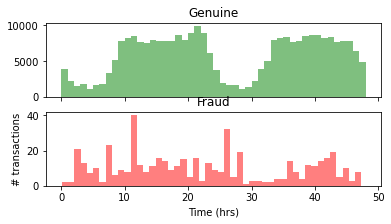

In [143]:
#plot Time to see if there is any trend
print("Time variable")
dataset["Time_Hr"] = dataset["Time"]/3600 # convert to hours
print(dataset["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(dataset.Time_Hr[dataset.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(dataset.Time_Hr[dataset.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

Text(0, 0.5, '# transactions')

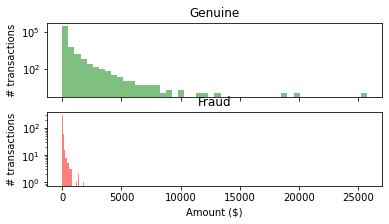

In [144]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(dataset.Amount[dataset.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(dataset.Amount[dataset.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

([<matplotlib.patches.Wedge at 0x164841777f0>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'Not Fraud'),
  Text(1.0999838018177286, -0.005969567707642625, 'Fraud')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.8%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.2%')])

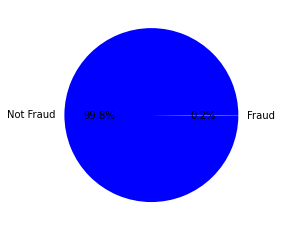

In [32]:
# Check distribution of our label data on original data
fig, ax = plt.subplots(1, 1)
ax.pie(dataset.Class.value_counts(),autopct='%1.1f%%', labels=['Not Fraud','Fraud'], colors=['b','r'])

In [33]:
# Check distribution of our label data on data train
train_set = pd.concat([x_train_clean, y_train], axis = 1)

In [34]:
train_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
249927,1.257992,-0.005578,0.427819,0.108347,-0.534196,0.425864,-0.489116,0.676802,-0.000318,-0.169658,...,-0.313204,-0.788791,0.067073,-0.596329,-0.947613,0.295700,0.579623,0.252462,-0.321082,0
214082,0.939713,0.904109,-0.110138,-1.449361,0.840920,0.442776,-0.760782,0.736596,-0.322162,-0.291515,...,0.379249,0.729482,-0.372721,-0.565282,0.945219,-0.887094,-0.183513,-0.173725,0.243475,0
106005,-0.528960,-0.550544,-2.676901,-0.919977,0.331363,-1.496917,-0.573444,1.283049,-0.590546,-1.174846,...,0.467427,-1.973705,-1.756150,0.836216,-0.267770,1.804491,-0.776446,0.689448,4.797594,0
58619,-0.977583,-0.263360,0.619460,-0.403529,-0.551463,1.783666,2.495035,0.037183,0.663671,-0.295311,...,-0.261482,-0.975989,0.231863,1.560567,-1.510087,0.082795,0.027490,0.769753,-0.331514,0
191638,0.725456,-0.325205,0.129183,0.187309,-1.261520,1.885635,3.011145,-0.159076,0.782832,0.430014,...,0.226255,1.045051,-0.515334,1.269290,-0.160452,1.270985,0.182557,-0.102717,-0.331514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-1.936441,-0.210544,0.431502,0.804626,-1.488310,0.134698,-0.959121,0.896237,-0.287008,0.420043,...,0.178900,1.041912,-0.466505,0.923485,0.072705,-1.807896,0.588352,-0.063524,-0.345305,0
233802,1.112066,1.014860,-0.310506,-0.407145,0.091431,-0.205674,0.295343,-0.658488,0.194279,0.904662,...,0.354035,1.217595,0.157428,0.455711,-0.373662,1.293097,-0.078608,-0.179173,-0.325587,0
85418,-0.718769,-0.761423,0.398019,1.041508,-0.017363,0.421322,0.974691,0.488243,0.114167,0.410278,...,-0.098497,0.411505,0.174875,-1.017923,-0.815640,0.547280,-1.098877,0.135446,-0.203089,0
29062,-1.254947,0.544775,0.044708,0.327588,1.062311,-0.274260,-0.277239,0.080790,-0.021186,0.289165,...,-0.084365,-0.061957,-0.081931,0.661438,1.138825,-0.695218,0.077058,0.073898,-0.169777,0


([<matplotlib.patches.Wedge at 0x164848ec040>,
 [Text(-1.0999838382378118, 0.005962852975853856, 'Not Fraud'),
  Text(1.0999838380916984, -0.005962879929724294, 'Fraud')],
 [Text(-0.5999911844933519, 0.0032524652595566487, '99.8%'),
  Text(0.5999911844136536, -0.003252479961667796, '0.2%')])

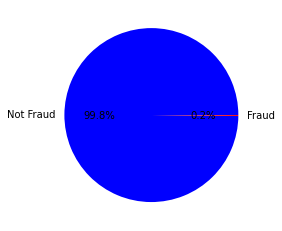

In [35]:
fig, ax = plt.subplots(1, 1)
ax.pie(train_set.Class.value_counts(),autopct='%1.1f%%', labels=['Not Fraud','Fraud'], colors=['b','r'])

In [36]:
# Check korelasi features V1 sampai V28
import seaborn as sns
import matplotlib.gridspec as gridspec

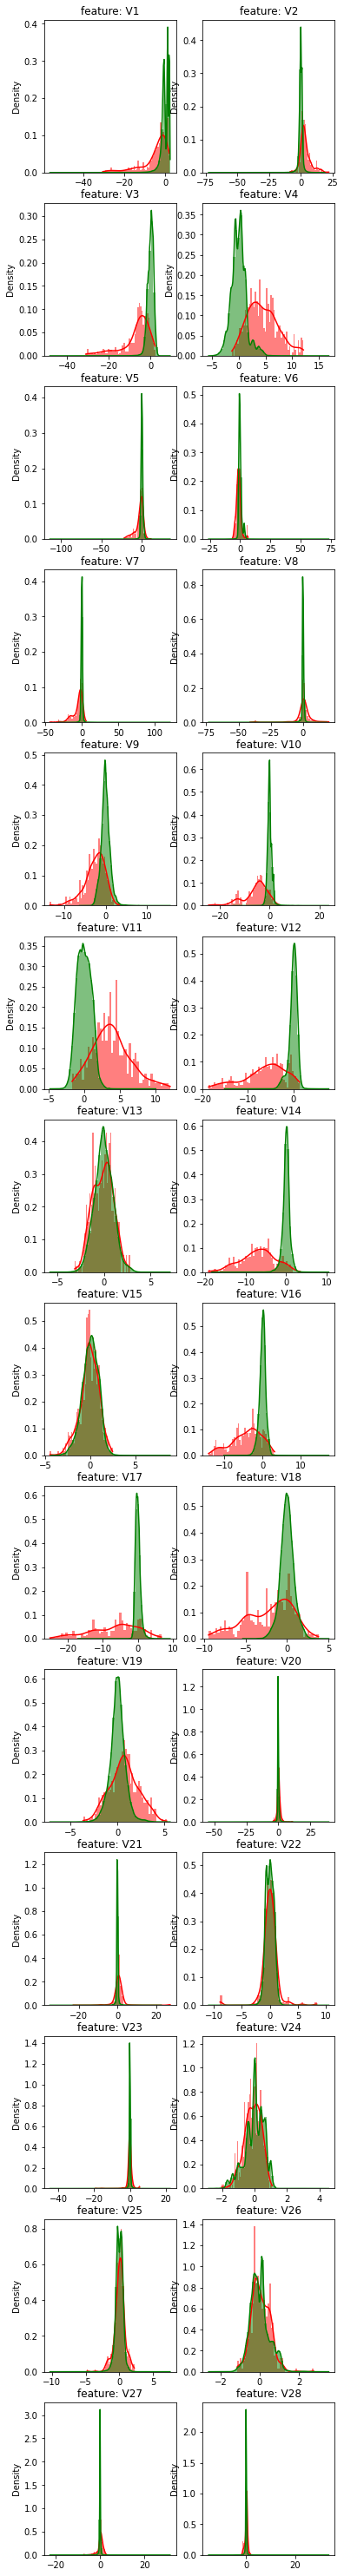

In [37]:
#
gs = gridspec.GridSpec(29, 2)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(dataset[dataset.iloc[:,1:29].columns]):
    ax5 = plt.subplot(gs[i])
    sns.histplot(dataset[col][dataset.Class == 1], bins=50, color='r',kde=True, stat="density", linewidth=0)
    sns.histplot(dataset[col][dataset.Class == 0], bins=50, color='g',kde=True, stat="density", linewidth=0)
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

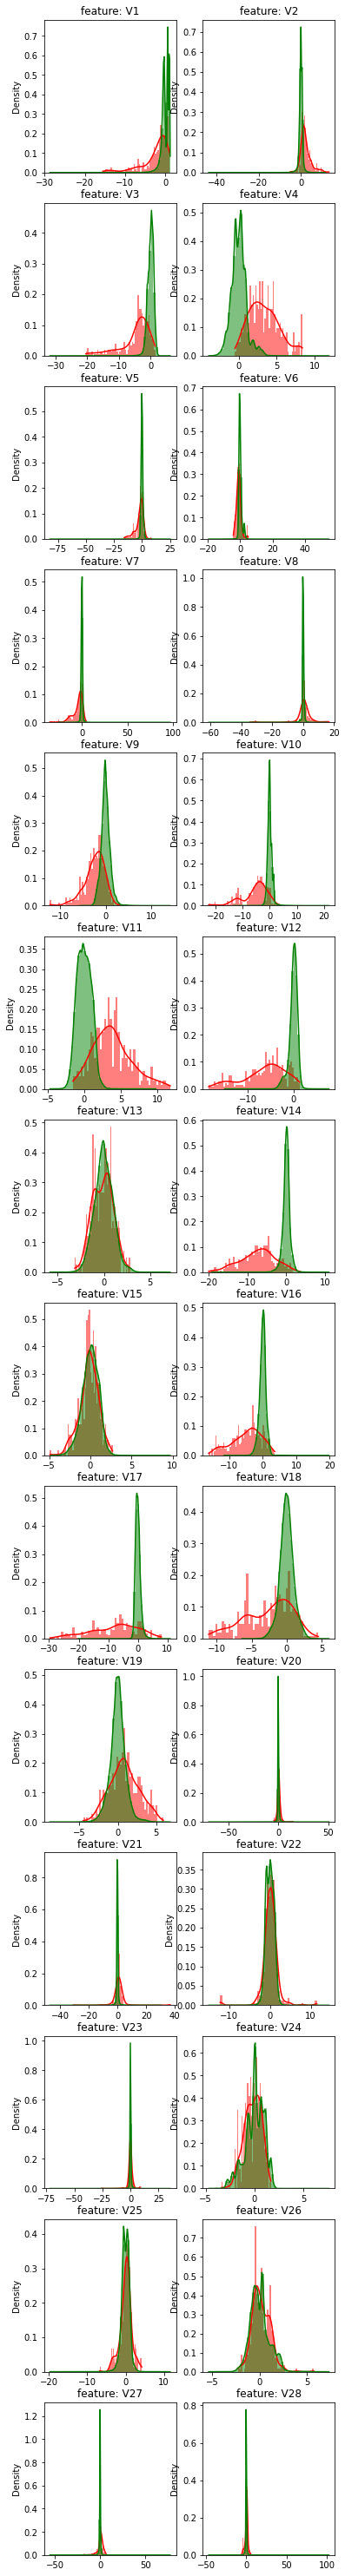

In [38]:
gs = gridspec.GridSpec(29, 2)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(train_set[train_set.iloc[:,1:29].columns]):
    ax5 = plt.subplot(gs[i])
    sns.histplot(train_set[col][train_set.Class == 1], bins=50, color='r',kde=True, stat="density", linewidth=0)
    sns.histplot(train_set[col][train_set.Class == 0], bins=50, color='g',kde=True, stat="density", linewidth=0)
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

# 5. Prediction Full Features

In [106]:
from imblearn.under_sampling import RandomUnderSampler

In [107]:
# Resampling
x_train_bal, y_train_bal = RandomUnderSampler(random_state = 42).fit_resample(x_train_clean,y_train)
# x_test_bal, y_test_bal = RandomUnderSampler(random_state = 42).fit_resample(x_test_clean,y_test)

In [108]:
x_train_bal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.192841,-0.489948,-0.024757,0.854280,-2.211815,-0.724219,-0.226361,-0.510208,0.480447,-2.120669,...,-0.450578,-0.177960,-0.084832,-0.606266,-0.620672,1.294734,-0.237561,0.366575,0.087954,-0.325547
1,1.374985,1.054980,0.122284,-1.102884,0.296116,0.324988,-0.663124,0.181240,-0.225595,0.365759,...,-0.152404,-0.481111,-1.227838,0.537408,0.965227,-0.464727,0.347565,-0.143468,-0.089047,-0.341433
2,-0.107017,0.000965,0.789933,0.075416,0.819701,0.389704,-0.416389,0.603671,-0.272094,-0.668283,...,0.372251,-0.220512,-0.456136,0.182708,1.853263,-2.029171,0.978807,-0.131916,0.731025,-0.313732
3,-0.316936,-0.598492,0.840553,1.157203,0.074966,0.745564,0.931864,0.676705,-0.313273,-0.160622,...,0.317083,-0.251425,-0.348265,-0.633133,-2.242717,0.179264,-1.216454,-3.662654,-2.695022,-0.329499
4,0.626193,1.191219,-0.859487,-0.791971,-1.147948,-0.804361,-0.412622,-0.935457,-0.082010,-0.878824,...,-0.679235,-0.294869,-0.284870,0.403057,0.673567,-0.315303,-0.356020,-0.015776,-0.159270,-0.309741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,-0.866948,-0.838413,0.763535,-0.690539,1.579470,-1.822322,-0.666072,-1.886384,0.714067,-1.168017,...,0.113849,0.916900,1.007440,0.531606,0.648770,-0.524760,1.663798,0.959501,0.338562,0.095095
684,-1.826270,0.436699,2.470296,-4.883854,5.209141,0.701485,-2.043360,-1.198494,0.454082,-2.141896,...,0.623610,0.506015,0.199739,0.383725,-0.387709,-1.925956,0.903699,1.517512,0.448733,-0.345305
685,1.076605,0.964078,1.150630,-2.312383,3.182406,1.473565,-1.063009,0.847320,-0.233476,-1.669872,...,-0.204926,-0.196117,-0.427558,-0.163588,-0.685703,0.723236,0.312541,-0.032637,0.144258,-0.340484
686,-0.011291,-13.458519,9.950994,-19.855023,6.284798,-12.897652,-0.918934,-24.989762,-9.541728,-8.614757,...,3.622386,-11.828954,4.765631,1.433028,0.421247,-1.414357,-2.004653,-17.813642,-4.020040,-0.345305


In [109]:
y_train_bal

0      0
1      0
2      0
3      0
4      0
      ..
683    1
684    1
685    1
686    1
687    1
Name: Class, Length: 688, dtype: int64

In [110]:
# Concatenate x and y each set
train_bal = pd.concat([x_train_bal, y_train_bal], axis = 1)
# test_bal = pd.concat([x_test_bal, y_test_bal], axis = 1)

([<matplotlib.patches.Wedge at 0x1648e14a610>,
 [Text(6.735557395310444e-17, 1.1, 'Not Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraud')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

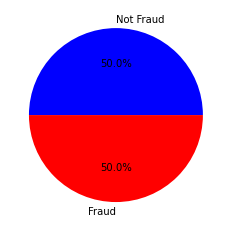

In [111]:
# Balancing on Training
fig, ax = plt.subplots(1, 1)
ax.pie(train_bal.Class.value_counts(),autopct='%1.1f%%', labels=['Not Fraud','Fraud'], colors=['b','r'])

In [112]:
def get_predictions_bal(classifier, x_train, y_train, x_test):
    # classifier
    classifier = classifier
    
    # fit training data
    classifier.fit(x_train_bal,y_train_bal)
    
    # predict test data
    y_pred = classifier.predict(x_test_clean)
    
    # predicted probabilities
    y_pred_prob = classifier.predict_proba(x_test_clean)

    
    return y_pred, y_pred_prob

In [125]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score\t: ", recall_score(y_test,y_pred))
    print("precision score\t: ", precision_score(y_test,y_pred))
    print("f1 score\t: ", f1_score(y_test,y_pred))
    print("accuracy score\t: ", accuracy_score(y_test,y_pred))
    print("ROC AUC\t\t: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    print("Classification Report\n",classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [127]:
# Tanpa Menghilangkan feature yang mempunyai distribusi yang sama
x_train_bal_drop = x_train_bal.drop(drop_list, axis=1)
x_test_clean_drop = x_test_clean.drop(drop_list, axis=1)

test-set confusion matrix:
 [[82372  2923]
 [   24   124]]
recall score	:  0.8378378378378378
precision score	:  0.04069576632753528
f1 score	:  0.07762128325508608
accuracy score	:  0.9655091698559274
ROC AUC		: 0.9536666465985301
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.84      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.90      0.53     85443
weighted avg       1.00      0.97      0.98     85443



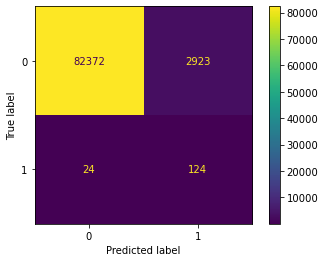

In [128]:
# Naive Baiyes
y_pred, y_pred_prob = get_predictions_bal(GaussianNB(), x_train_bal_drop, y_train_bal, x_test_clean_drop)
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[84520   775]
 [   25   123]]
recall score	:  0.831081081081081
precision score	:  0.13697104677060135
f1 score	:  0.23518164435946465
accuracy score	:  0.9906370328757184
ROC AUC		: 0.9756717148592405
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.83      0.24       148

    accuracy                           0.99     85443
   macro avg       0.57      0.91      0.62     85443
weighted avg       1.00      0.99      0.99     85443



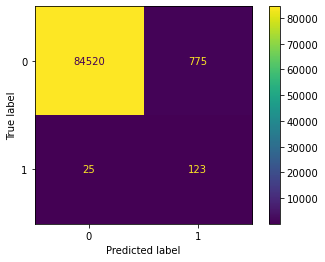

In [129]:
# Logistic Regression
y_pred, y_pred_prob = get_predictions_bal(LogisticRegression(C = 0.01, penalty = 'l2'), x_train_bal_drop, y_train_bal, x_test_clean_drop)
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[75047 10248]
 [   18   130]]
recall score	:  0.8783783783783784
precision score	:  0.012526498361919445
f1 score	:  0.024700741022230667
accuracy score	:  0.8798497243776553
ROC AUC		: 0.8791153278843062
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     85295
           1       0.01      0.88      0.02       148

    accuracy                           0.88     85443
   macro avg       0.51      0.88      0.48     85443
weighted avg       1.00      0.88      0.93     85443



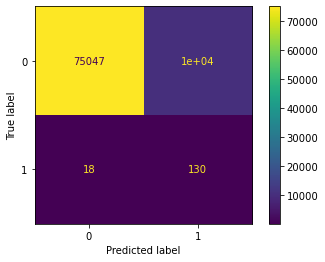

In [130]:
# Decision Tree
y_pred, y_pred_prob = get_predictions_bal(DecisionTreeClassifier(), x_train_bal_drop, y_train_bal, x_test_clean_drop)
print_scores(y_test,y_pred,y_pred_prob)

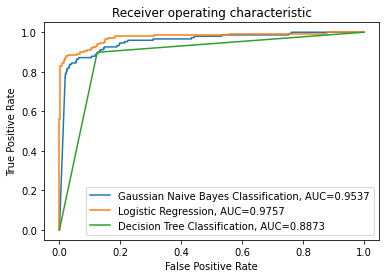

In [131]:
from sklearn import metrics

#ROC plot
plt.figure(0).clf()
y_pred, y_pred_prob = get_predictions_bal(GaussianNB(), x_train_bal_drop, y_train_bal, x_test_clean_drop)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1])
auc = round(metrics.roc_auc_score(y_test, y_pred_prob[:, 1]), 4)
plt.plot(fpr,tpr,label="Gaussian Naive Bayes Classification, AUC="+str(auc))

y_pred, y_pred_prob = get_predictions_bal(LogisticRegression(C = 0.01, penalty = 'l2'), x_train_bal_drop, y_train_bal, x_test_clean_drop)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1])
auc = round(metrics.roc_auc_score(y_test, y_pred_prob[:, 1]), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

y_pred, y_pred_prob = get_predictions_bal(DecisionTreeClassifier(), x_train_bal_drop, y_train_bal, x_test_clean_drop)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1])
auc = round(metrics.roc_auc_score(y_test, y_pred_prob[:, 1]), 4)
plt.plot(fpr,tpr,label="Decision Tree Classification, AUC="+str(auc))

#add legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# 6. Prediction Features Selection

In [136]:
# Menghilangkan feature yang mempunyai distribusi yang sama
drop_list = ["Time","V28","V27","V26","V25","V24","V23","V22","V21","V20","V15","V13","V8","V7","V6","V5","Amount"]
x_train_bal_drop = x_train_bal.drop(drop_list, axis=1)
x_test_clean_drop = x_test_clean.drop(drop_list, axis=1)

test-set confusion matrix:
 [[82372  2923]
 [   24   124]]
recall score	:  0.8378378378378378
precision score	:  0.04069576632753528
f1 score	:  0.07762128325508608
accuracy score	:  0.9655091698559274
ROC AUC		: 0.9536666465985301
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.84      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.90      0.53     85443
weighted avg       1.00      0.97      0.98     85443



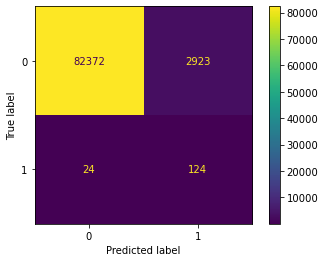

In [138]:
# Naive Baiyes
y_pred, y_pred_prob = get_predictions_bal(GaussianNB(), x_train_bal_drop, y_train_bal, x_test_clean_drop)
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[84520   775]
 [   25   123]]
recall score	:  0.831081081081081
precision score	:  0.13697104677060135
f1 score	:  0.23518164435946465
accuracy score	:  0.9906370328757184
ROC AUC		: 0.9756717148592405
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.83      0.24       148

    accuracy                           0.99     85443
   macro avg       0.57      0.91      0.62     85443
weighted avg       1.00      0.99      0.99     85443



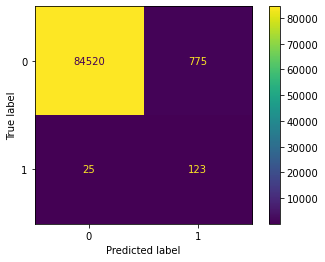

In [139]:
# Logistic Regression
y_pred, y_pred_prob = get_predictions_bal(LogisticRegression(C = 0.01, penalty = 'l2'), x_train_bal_drop, y_train_bal, x_test_clean_drop)
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[74714 10581]
 [   16   132]]
recall score	:  0.8918918918918919
precision score	:  0.012321478577429292
f1 score	:  0.02430715403738146
accuracy score	:  0.8759757967299837
ROC AUC		: 0.8839200358691537
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.88      0.93     85295
           1       0.01      0.89      0.02       148

    accuracy                           0.88     85443
   macro avg       0.51      0.88      0.48     85443
weighted avg       1.00      0.88      0.93     85443



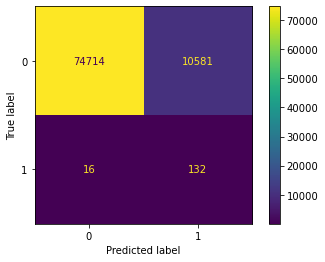

In [140]:
# Decision Tree
y_pred, y_pred_prob = get_predictions_bal(DecisionTreeClassifier(), x_train_bal_drop, y_train_bal, x_test_clean_drop)
print_scores(y_test,y_pred,y_pred_prob)

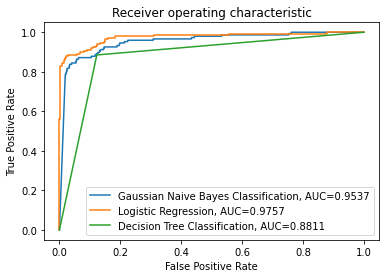

In [124]:
from sklearn import metrics

#ROC plot
plt.figure(0).clf()
y_pred, y_pred_prob = get_predictions_bal(GaussianNB(), x_train_bal_drop, y_train_bal, x_test_clean_drop)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1])
auc = round(metrics.roc_auc_score(y_test, y_pred_prob[:, 1]), 4)
plt.plot(fpr,tpr,label="Gaussian Naive Bayes Classification, AUC="+str(auc))

y_pred, y_pred_prob = get_predictions_bal(LogisticRegression(C = 0.01, penalty = 'l2'), x_train_bal_drop, y_train_bal, x_test_clean_drop)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1])
auc = round(metrics.roc_auc_score(y_test, y_pred_prob[:, 1]), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

y_pred, y_pred_prob = get_predictions_bal(DecisionTreeClassifier(), x_train_bal_drop, y_train_bal, x_test_clean_drop)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1])
auc = round(metrics.roc_auc_score(y_test, y_pred_prob[:, 1]), 4)
plt.plot(fpr,tpr,label="Decision Tree Classification, AUC="+str(auc))

#add legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()